<a href="https://colab.research.google.com/github/adrianadamata/Data_Science_Analise_Dados_Airbnb_Havai/blob/master/Analisando_os_Dados_do_Airbnb_havai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Havaí - EUA

A primeira versão do [Airbnb](https://www.airbnb.com.br/) foi lançada com apenas uma casa disponível para aluguel, a casa dos próprios criadores do site!
A ideia de alugar um imóvel se expandiu! Hoje, a empresa se entitula como uma rede de economia compartilhada em todo o mundo.

Já não são apenas imóveis cadastrados. A ideia é permitir que qualquer item ocioso possa ser disponibilizado para aluguel. E a Startup cresce cada vez mais, ganhando destaque mundial.

Como iniciativa, a empresa disponibiliza os dados sobre algumas cidades do mundo no [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a fim de viabilizar discussões públicas e análise dos dados para possíveis soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, serão analisados os dados referentes ao Estado Americano do Havaí, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/hi/hawaii/2019-12-04/visualisations/listings.csv")

## Análise dos Dados
Para a compreensão do problema é preciso conhecer os significados de cada variável. Para isso, estão listados abaixo os significados das variáveis presentes no arquivo de dados baixado na linha de código anterior, representado por **df**.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do Condado ao qual pertence o Distrito
* `neighbourhood` - nome do Distrito
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,37,2019-08-19,0.45,2,359
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02621,-155.70145,Entire home/apt,110,2,9,2019-10-20,0.09,5,251
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,92,5,162,2019-11-19,1.36,3,282
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,299,6,17,2019-11-21,0.23,3,217
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,130,2019-11-18,1.01,1,170


Os distritos do Havaí com imóveis cadastrados no Airbnb são:

In [0]:
df['neighbourhood'].unique()

array(['Hamakua', 'South Kohala', 'South Kona', 'North Kona',
       'Koloa-Poipu', 'North Shore Kauai', 'Puna', 'Kihei-Makena',
       'North Shore Oahu', 'Koolaupoko', 'Lahaina',
       'Primary Urban Center', 'South Hilo', 'Paia-Haiku', 'Kapaa-Wailua',
       'Waianae', 'East Honolulu', 'Koolauloa', 'Ewa', 'North Kohala',
       'Waimea-Kekaha', 'Molokai', 'Wailuku-Kahului', 'Kau',
       'Makawao-Pukalani-Kula', 'Lihue', 'North Hilo', 'Hana',
       'Central Oahu', 'Lanai'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Essse dataset baixado é uma versão resumida do Airbnb, o arquivo `listings.csv`. Possui 16 `variáveis` para cada imóvel e 23840 `entradas` que correspondem à quantidade de imóveis anunciados.


In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis: \t {}".format(df.shape[1]))
print("Entradas: \t {}".format(df.shape[0]))

# verificar os tipos de dados de cada entrada do dataset
display(df.dtypes)

Variáveis: 	 16
Entradas: 	 23745


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A quantidade de campos nulos influencia o resultado das análises de um dataset. Os campos nulos não possuem alocação de endereço na memória e tenativas de concatenação podem dar de endereço. Portanto, analisando os valores ausentes podemos ficar atentos:
* As variáves `reviews_per_month` e `last_review` são as que possuem a porcentagem mais alta de campos ausentes, com aproximadamente 23% de entradas nulas;
* A variável `host_name` possui 1,16% de valores ausentes;
* E a variável `name` apresenta porcentagem baixa de campos nulos com 0,07%
* As demais variáveis não apresentam valores ausentes, com uma maior quantidade de dados de entrada.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.229564
last_review                       0.229564
host_name                         0.011623
name                              0.000674
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3.a Qual o tipo de distribuição das variáveis?** 
Para visualizar as variáveis numéricas, serão utilizados os gráficos de histogramas. Através do histograma é possível ver a distribuição das variáveis numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7bbe0fb70>,
      dtype=object)

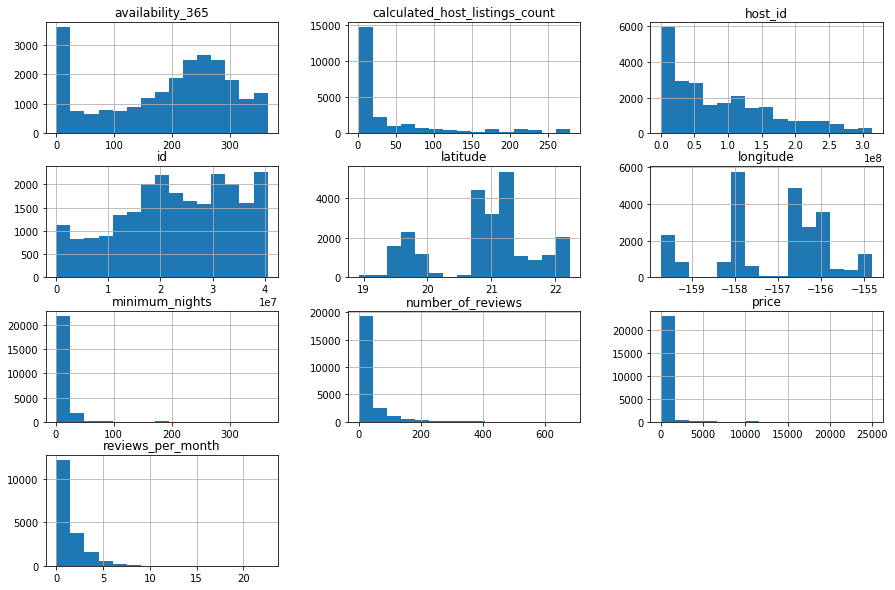

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### Q3.b Há outliers presentes?
É possível observar que as variáveis `minimum_nights` e `price`, possuem valores que não representam uma distribuição. Para confirmar a presença de outliers, iremos utilizar duas técnicas:
* Resumo Estatístico por meio do Método `describe`;
* Plotar `boxplots`;

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['availability_365','latitude','longitude','minimum_nights','number_of_reviews','price','reviews_per_month']].describe()

,availability_365,latitude,longitude,minimum_nights,number_of_reviews,price,reviews_per_month
count,23745.000000,23745.000000,23745.000000,23745.000000,23745.000000,23745.000000,18294.000000
mean,190.334344,20.881056,-157.128280,5.385597,26.257907,358.380291,1.398526
std,110.226253,0.790525,1.242902,11.176797,46.780110,936.067258,1.523295
min,0.000000,18.920990,-159.714900,1.000000,0.000000,0.000000,0.000000
25%,102.000000,20.690630,-157.837800,1.000000,1.000000,128.000000,0.300000
50%,219.000000,20.952780,-156.688670,3.000000,7.000000,199.000000,0.880000
75%,275.000000,21.300390,-156.380400,5.000000,31.000000,340.000000,2.020000
max,365.000000,22.229110,-154.815770,365.000000,680.000000,24999.000000,22.600000


A partir do resumo estatístico acima é possível observar que:
* 75% dos imóveis possui o mínimo de noites abaixo de 5 dias, no entanto, o valor máximo de mínimo de noites cadastrado chega a 365 dias;
* Na variável preço, a distorção entre a maioria dos dados e o valor máximo também ocorre.

#### Boxplot para `availability_365`

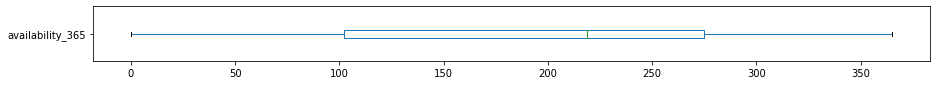

In [0]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 1))
plt.show()

Não há presença de outliers na variável `availability_365`

#### Boxplot para `minimum_nights`

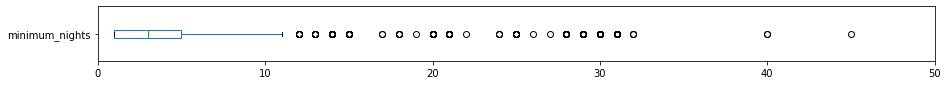

In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, xlim=(0,50), figsize=(15, 1))
plt.show()

In [0]:
# ver quantidade de valores acima de 12 para minimum_nights
print("\n: valores acima de 12")
print("{} entradas".format(len(df[df.minimum_nights > 12])))
print("{:.4f}%".format((len(df[df.minimum_nights > 12]) / df.shape[0])*100))


: valores acima de 12
1917 entradas
8.0733%


Neste caso, verificamos a presença de outliers na variável `minimun_nights`. Há poucas entradas com a característica de mínimo de noites a partir de 12 dias. Estas entradas que correspondem a 8.0733% podem distorcer a distribuição do conjunto de dados.

Neste caso, verificamos a presença de outliers na variável minimum_nights

#### Boxplot para `number_of_reviews`

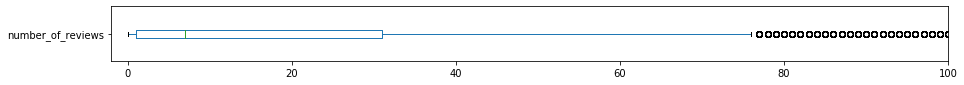

In [0]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, xlim=([-2,100]), figsize=(15, 1))
plt.show()

In [0]:
# ver quantidade de valores acima de 78 para number_of_reviews
print("\n: valores acima de 78")
print("{} entradas".format(len(df[df.number_of_reviews > 78])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 78]) / df.shape[0])*100))


: valores acima de 78
2331 entradas
9.8168%


Neste caso, verificamos a presença de outliers na variável `number_of_reviews`. Há poucas entradas com a característica de quantidade de avaliações a partir de 78 avaliações. Estas entradas que correspondem a 9.8168% podem distorcer a distribuição do conjunto de dados. 

#### Boxplot para `price`

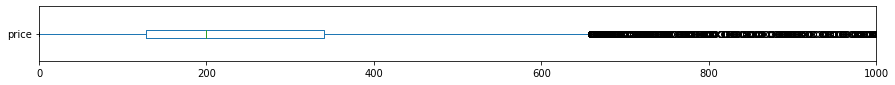

In [0]:
# price
df.price.plot(kind='box', vert=False, xlim=([0,1000]), figsize=(15, 1))
plt.show()

In [0]:
# ver quantidade de valores acima de 700 para price
print("\n: valores acima de 700")
print("{} entradas".format(len(df[df.price > 700])))
print("{:.4f}%".format((len(df[df.price > 700]) / df.shape[0])*100))


: valores acima de 700
1752 entradas
7.3784%


Neste caso, verificamos a presença de outliers na variável `price`. Há poucas entradas com valor da diária a partir de 700 dólares. Estas entradas que correspondem a 7.3784% podem distorcer a distribuição do conjunto de dados.


#### Histogramas sem *outliers*

Foram identicados *outliers* nas variáveis `price` e `minimum_nights`, por isso as entradas com outliers serão eliminadas do *DataFrame* e os histogramas plotados novamente. A variável `number_of_reviews` também apresentou presença de outliers. No entanto, estas entradas não serão removidas pois podem ser excluídos imóveis que fogem da distribuição dos dados justamente por se destacarem com mais de 78 avaliações.

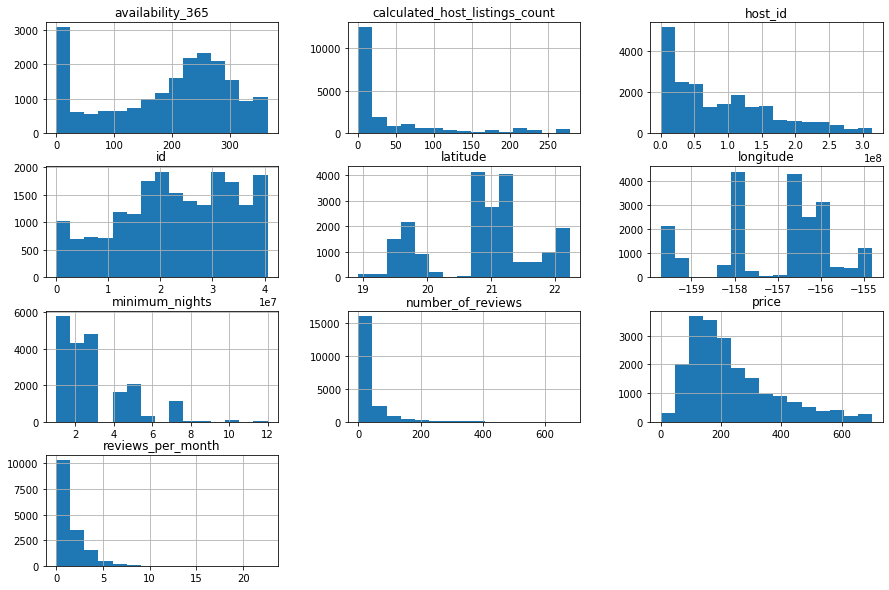

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 700].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 12].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Em cada Distrito, é possível calcular a média de valores do aluguel. Os valores são agrupados por distrito através do comando `groupby()`

In [0]:
# ver a média da variável price em cada distrito:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)

neighbourhood
Kau                      110.298780
Puna                     112.864023
South Hilo               130.603524
Molokai                  147.519481
South Kona               148.508091
North Kohala             152.313953
Waianae                  155.236364
Hamakua                  156.376812
North Hilo               157.051724
Central Oahu             157.804348
North Shore Oahu         166.206406
Primary Urban Center     179.360264
Wailuku-Kahului          187.000000
North Kona               193.577402
Koolaupoko               205.775000
Makawao-Pukalani-Kula    225.500000
East Honolulu            226.505263
Koolauloa                227.764535
Paia-Haiku               232.316239
Lihue                    238.099502
Kapaa-Wailua             240.262609
Waimea-Kekaha            246.321429
Lanai                    258.400000
Kihei-Makena             263.597783
Hana                     268.694444
North Shore Kauai        277.457683
South Kohala             300.023202
Lahaina       

Observa-se que os distritos Kau, Puna, South Hilo, Molokai e South Kona possuem a média de diária abaixo de 150 dólares. Dentre elas, apenas Molokai não esta localizada na Grande Ilha do Havaí. Kau em específico é conhecido por ser um local menos agitado, ao lado do Parque Nacional dos Vulcões do Havaí.

### **Q5. Qual a correlação existente entre as variáveis**
Ao analisar os coeficientes de correlação linear entre as variáveis, é possível chegar à seguinte tabela de coeficientes:

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month
price,1.000000,0.293684,-0.297682,-0.341902
minimum_nights,0.293684,1.000000,-0.182556,-0.291089
number_of_reviews,-0.297682,-0.182556,1.000000,0.627066
reviews_per_month,-0.341902,-0.291089,0.627066,1.000000


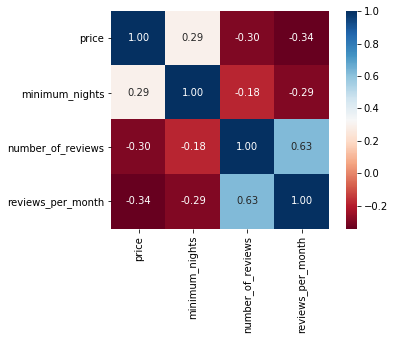

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Podemos considerar que as variáveis mais correlacionadas foram: número de avaliações comparado à quantidade de avaliações por mês. Pois estas apresentaram o maior coeficiente de correlação.
Outra correlação baixa é observada entre o valor da diária e o mínimo de noites. Indicando que o valor aumenta em imóveis que restringem um mínimo de noites mais alto.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
Os imóveis do Airbnb são categorizados em: Casa/Apto inteiro; Quarto Privado; Quarto em Hotel; Quarto compartilhado.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17762
Private room        2047
Hotel room           243
Shared room          107
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.881095
Private room       0.101543
Hotel room         0.012054
Shared room        0.005308
Name: room_type, dtype: float64

Através da análise é possível identificar que 88.11% dos imóveis cadastrados no Havaí são Casa/Apto Inteiro. Uma porcentagem alta, indicando predominância deste tipo de imóvel.

### **Q7. Qual a localidade mais cara do dataset?**
O distrito Ewa apresenta os imóveis com valor médio mais alto: de 333.44 dólares.


In [0]:
# ver preços por distritos, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Ewa                  333.446154
Koloa-Poipu          328.723214
Lahaina              307.364236
South Kohala         300.023202
North Shore Kauai    277.457683
Name: price, dtype: float64

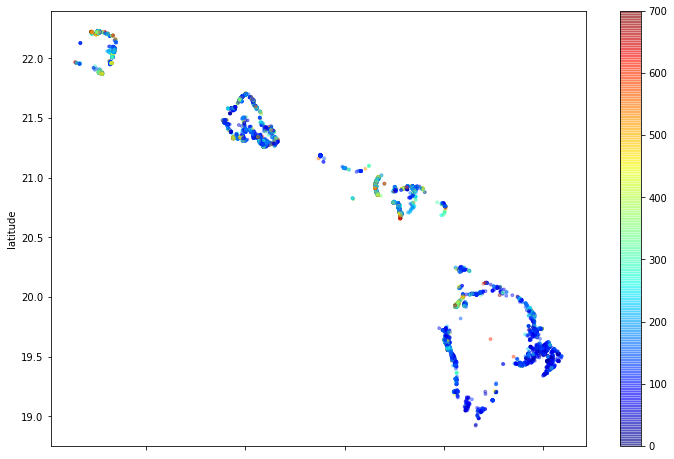

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

2.7976090083833522

A média é de aluguéis com mínimo de 2.8 noites. 

## Conclusões


A partir da análise de dados e tratamento de outliers, é possível observar que a média dos preços de aluguel varia conforme o distrito. Os distritos com aluguel de imóveis mais em conta estão localizados na Grande Ilha do Havaí, região do Parque Nacional dos Vulcões, região menos comercial. \\
O tipo de imóvel que prevalece no Airbnb do Havaí é Casa/Apto inteiro, com porcentagem predominante. \\
A média de valores de aluguel mais alta encontra-se no distrito de Ewa, na famosa praia de Ewa, condado de Honolulu (região mais populosa).

